In [5]:
from google.colab import files
uploaded = files.upload()

Saving data_set.csv to data_set.csv


In [0]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np




In [7]:

data = pd.read_csv('data_set.csv')
print(data.head())

                  FILE   VAR  Y
0  csi_noactivity_1-01  1.01  0
1  csi_noactivity_1-02  0.59  0
2  csi_noactivity_1-03  0.77  0
3  csi_noactivity_1-04  0.78  0
4  csi_noactivity_1-05  0.77  0


In [0]:
from sklearn import svm
train, test = train_test_split(data, test_size=.2) 
train_normal = train[train['Y']==1] 
train_outliers = train[train['Y']==0] 
outlier_prop = len(train_outliers) / len(train_normal) 
model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.0001) 
classifier = model.fit(train_normal[['VAR']])

0 -- > noactivity
1 --> activity


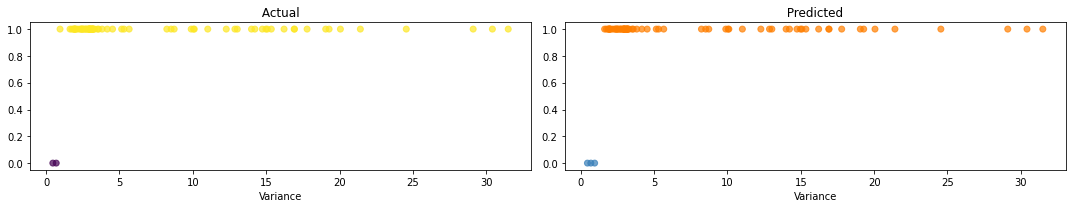

In [39]:
x1 = test[['VAR']] 
x2 = test['VAR'] 
y1 = test[['Y']]



y_pred = model.predict(test[['VAR']]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0

y2 = y_pred

print('0 -- > noactivity')
print('1 --> activity')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
axes[0].scatter(x1,y1, alpha=0.7, c=test['Y']) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('Variance')

#axes[0].label('Actual plot')
colors = np.array(['#377eb8', '#ff7f00']) 
axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('Variance')
fig.tight_layout()

In [40]:
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(75,))

preds = y_pred


print('this is Actual : ',targs)
print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


#print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


this is Actual :  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1]
this is predicted :  [1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1]
accuracy:  0.9866666666666667
recall:  0.9863013698630136
f1:  0.993103448275862
area under curve (auc):  0.9931506849315068


In [20]:
from sklearn.metrics import confusion_matrix


#print(np.shape(y_test))
#print(np.shape(preds))

cm = confusion_matrix(targs, preds)
print(cm)

#disp = confusion_matrix(model, test[['VAR']], test[['Y']],normalize='true')

[[ 3  0]
 [ 2 70]]


Confusion matrix, without normalization
[[ 2  0]
 [ 1 72]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


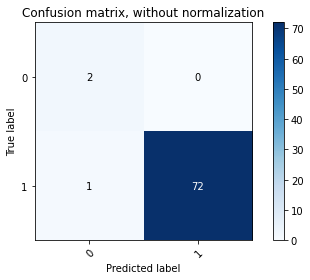

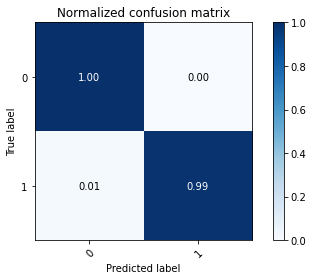

In [41]:
class_names = [0,1]

y_test = targs
y_pred = preds

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
